# IMPORTS

In [1]:
# Importar a função train_test_split
from sklearn.model_selection import train_test_split

#Importar modelo Gaussiano Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Importar módulo de métricas scikit-learn para cálculo de precisão
from sklearn import metrics

#Importar função AccuracyScore
from sklearn.metrics import accuracy_score

#Importar função ConfusionMatrix
from sklearn.metrics import confusion_matrix

#Importar função ClassificationReport
from sklearn.metrics import classification_report

#Importar biblioteca seaborn
import seaborn as sns

#Importar biblioteca pyplot
import matplotlib.pyplot as plt

#Importar biblioteca pandas
import pandas as pd

# IMPORTANDO E LIMPANDO DADOS

In [3]:
df_api = pd.read_csv ('api_data.csv').dropna()
df_api_colunas = pd.read_csv ('api_data_graphic.csv').dropna()

df_mono = pd.read_csv ('mono_data.csv').dropna()
df_mono_colunas = pd.read_csv ('mono_data_graphic.csv').dropna()

In [3]:
df_api.isnull().sum()

API 1     0
API 2     0
API 3     0
API 4     0
API 5     0
API 6     0
API 7     0
API 8     0
API 9     0
API 10    0
TESTE     0
dtype: int64

In [4]:
df_api_colunas.isnull().sum()

Functional appropriateness    0
Resource utilization          0
Capacity                      0
Interoperability              0
User error protection         0
Fault tolerance               0
Confidentiality               0
Integrity                     0
Modularity                    0
Reusability                   0
Analysability                 0
Testability                   0
Adaptability                  0
Installability                0
dtype: int64

In [5]:
df_mono.isnull().sum()

MONO 1     0
MONO 2     0
MONO 3     0
MONO 4     0
MONO 5     0
MONO 6     0
MONO 7     0
MONO 8     0
MONO 9     0
MONO 10    0
TESTE      0
dtype: int64

In [6]:
df_mono_colunas.isnull().sum()

Functional appropriateness    0
Resource utilization          0
Capacity                      0
Interoperability              0
User error protection         0
Fault tolerance               0
Confidentiality               0
Integrity                     0
Modularity                    0
Reusability                   0
Analysability                 0
Testability                   0
Adaptability                  0
Installability                0
dtype: int64

# ANALISE DE DADOS

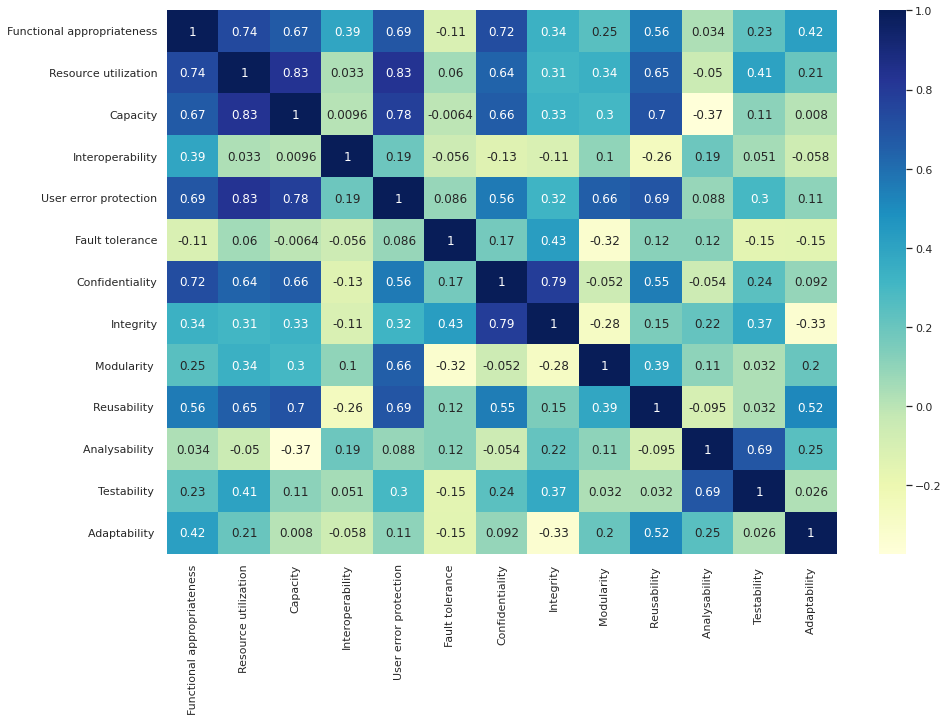

In [7]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_api_colunas.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

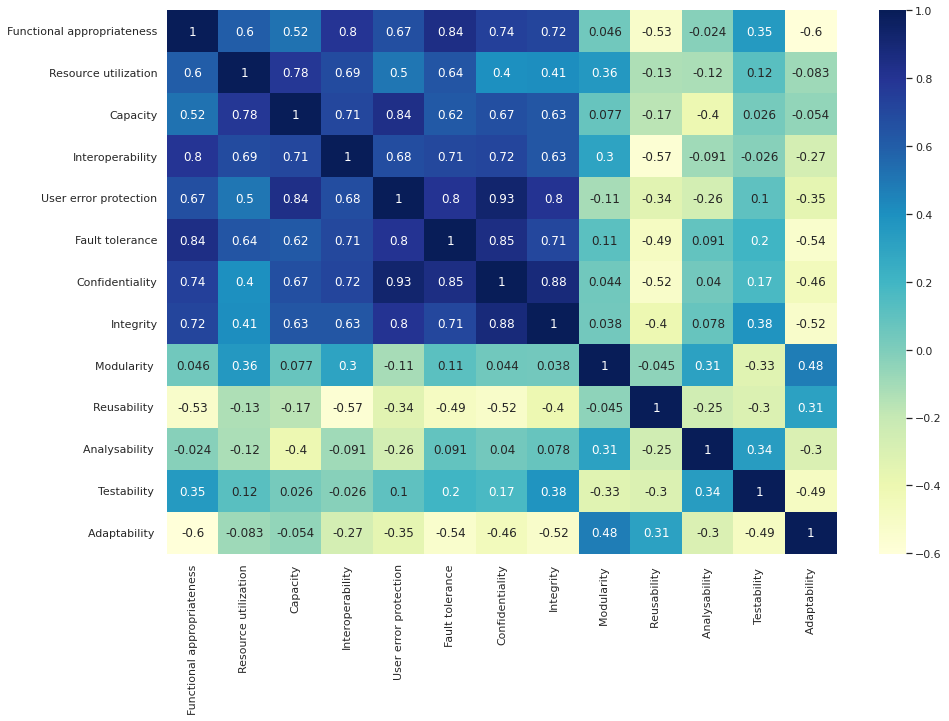

In [8]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_mono_colunas.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

# TREINAMENTO DAS IAs


In [23]:
X = df_api.drop(['TESTE'], axis=1)

Y = df_api['TESTE']

In [42]:
#Dividir o conjunto de dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=109) # 80% treinamento e 20% teste

In [25]:
X_train.shape, X_test.shape

((9, 10), (5, 10))

In [43]:
#Criar um Classificador Gaussiano
gnb_api = GaussianNB()

#Treinar o modelo usando os conjuntos de treinamento
gnb_api.fit(X_train, y_train)

#Prever a resposta para o conjunto de dados de teste
y_pred_api = gnb_api.predict(X_test)

In [27]:
X_2 = df_mono.drop(['TESTE'], axis=1)

Y_2 = df_mono['TESTE']

In [39]:
#Dividir o conjunto de dados em conjunto de treinamento e conjunto de teste
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, train_size = 0.8, test_size = 0.2, random_state=109) # 80% treinamento e 20% teste

In [35]:
X_train_2.shape, X_test_2.shape

((9, 10), (5, 10))

In [40]:
#Criar um Classificador Gaussiano
gnb_mono = GaussianNB()

#Treinar o modelo usando os conjuntos de treinamento
gnb_mono.fit(X_train_2, y_train_2)

#Prever a resposta para o conjunto de dados de teste
y_pred_mono = gnb_mono.predict(X_test_2)

# ANÁLISE DOS RESULTADOS

##ACURÁCIA DOS MODELOS

In [44]:
# Precisão do modelo, com que frequência o classificador está correto?
print('Model accuracy score API: {0:0.4f}'. format(accuracy_score(y_test, y_pred_api)))

Model accuracy score API: 0.3333


In [41]:
# Precisão do modelo, com que frequência o classificador está correto?
print('Model accuracy score MONO: {0:0.4f}'. format(accuracy_score(y_test_2, y_pred_mono)))

Model accuracy score MONO: 0.6667


##PONTUAÇÃO DOS TESTES

In [45]:
# print the scores on training and test set

print('Training set score API: {:.4f}'.format(gnb_api.score(X_train, y_train)))

print('Test set score API: {:.4f}'.format(gnb_api.score(X_test, y_test)))

Training set score API: 1.0000
Test set score API: 0.3333


In [46]:
# print the scores on training and test set

print('Training set score MONO: {:.4f}'.format(gnb_mono.score(X_train_2, y_train_2)))

print('Test set score MONO: {:.4f}'.format(gnb_mono.score(X_test_2, y_test_2)))

Training set score MONO: 0.8182
Test set score MONO: 0.6667


##MATRIZ DE CONFUSAO

In [47]:
cm = confusion_matrix(y_test, y_pred_api)

print('Confusion matrix API\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix API

 [[1 0 1]
 [0 0 1]
 [0 0 0]]

True Positives(TP) =  1

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  0


In [48]:
cm_2 = confusion_matrix(y_test, y_pred_mono)

print('Confusion matrix MONO\n\n', cm_2)

print('\nTrue Positives(TP) = ', cm_2[0,0])

print('\nTrue Negatives(TN) = ', cm_2[1,1])

print('\nFalse Positives(FP) = ', cm_2[0,1])

print('\nFalse Negatives(FN) = ', cm_2[1,0])

Confusion matrix MONO

 [[2 0]
 [1 0]]

True Positives(TP) =  2

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  1


##CLASSIFICAÇÕES DE ACURÁCIA E ERRO

In [49]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

TP_2 = cm_2[0,0]
TN_2 = cm_2[1,1]
FP_2 = cm_2[0,1]
FN_2 = cm_2[1,0]

In [50]:
classification_accuracy_api = (TP + TN) / float(TP + TN + FP + FN)
classification_accuracy_mono = (TP_2 + TN_2) / float(TP_2 + TN_2 + FP_2 + FN_2)

classification_error_api = (FP + FN) / float(TP + TN + FP + FN)
classification_error_mono = (FP_2 + FN_2) / float(TP_2 + TN_2 + FP_2 + FN_2)

In [51]:
print('Classification accuracy API : {0:0.4f}'.format(classification_accuracy_api))
print('Classification accuracy MONO : {0:0.4f}'.format(classification_accuracy_mono))

Classification accuracy API : 1.0000
Classification accuracy MONO : 0.6667


In [52]:
print('Classification error API : {0:0.4f}'.format(classification_error_api))
print('Classification error MONO: {0:0.4f}'.format(classification_error_mono))

Classification error API : 0.0000
Classification error MONO: 0.3333
